**Heart Disease Prediction**
--
*By: JOTJIT NATH*


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SmartKnower/Minor Project/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.shape

(303, 14)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style("whitegrid")

Text(0.5, 0, '')

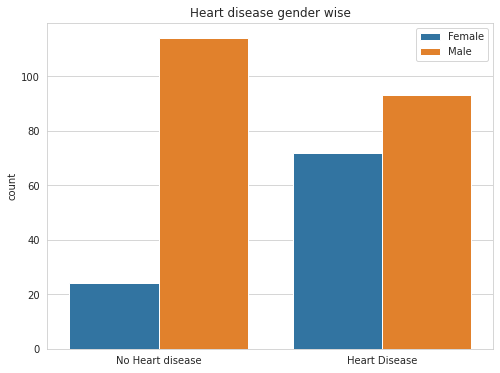

In [ ]:
plt.figure(figsize =(8, 6))
f = sns.countplot(x = 'target', data = df, hue = 'sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease gender wise")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

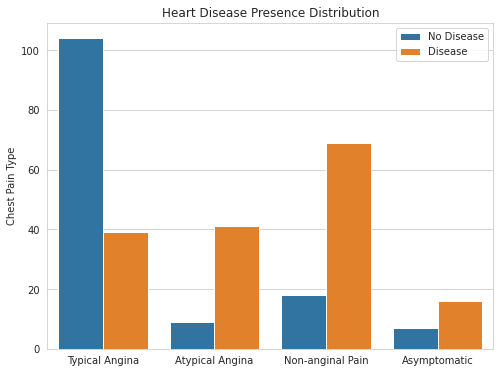

In [ ]:
plt.figure(figsize =(8, 6))
f = sns.countplot(x='cp', data=df, hue='target')
f.set_title("Heart Disease Presence Distribution")
f.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.ylabel("Chest Pain Type")
plt.xlabel("")
plt.legend(['No Disease', 'Disease'])

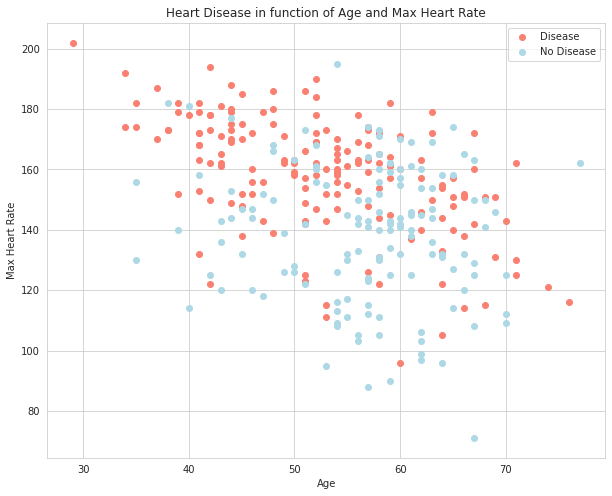

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df.age[df.target==1],
    df.thalach[df.target==1],
    c="salmon")
plt.scatter(df.age[df.target==0],
    df.thalach[df.target==0],
    c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

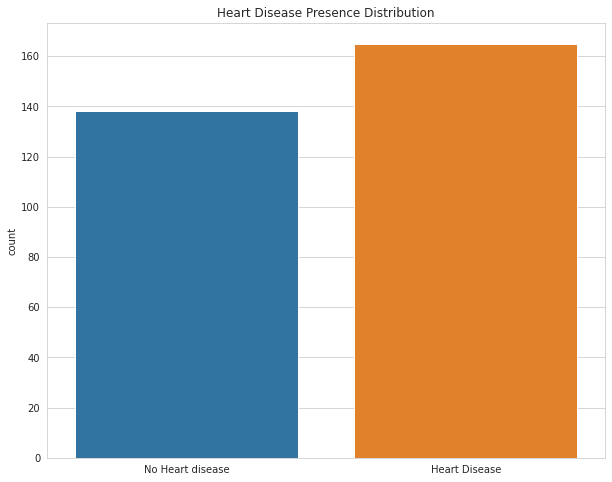

In [ ]:
plt.figure(figsize =(10, 8))
f = sns.countplot(x='target', data=df)
f.set_title("Heart Disease Presence Distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

In [ ]:
feature_columns = []
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']:
    feature_columns.append(tf.feature_column.numeric_column(header))
feature_columns

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='trestbps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='chol', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='thalach', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='oldpeak', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='ca', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
def df_to_dataset(dataframe, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('target')
    return tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) \
          .shuffle(buffer_size=len(dataframe)) \
          .batch(batch_size)

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=32)
train_ds = df_to_dataset(train)
test_ds = df_to_dataset(test)

In [ ]:
for feature_batch, label_batch in train_ds.take(2):
    print('Every feature:', list(feature_batch.keys()))
    print('A batch of ages:', feature_batch['age'])
    print('A batch of targets:', label_batch )

Every feature: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
A batch of ages: tf.Tensor(
[51 56 64 58 46 44 40 57 44 57 54 51 42 52 66 67 56 58 59 41 56 42 45 51
 62 42 56 64 46 46 44 41], shape=(32,), dtype=int64)
A batch of targets: tf.Tensor([0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1], shape=(32,), dtype=int64)
Every feature: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
A batch of ages: tf.Tensor(
[54 52 47 56 59 70 64 41 57 46 35 61 62 67 43 63 77 52 58 35 60 61 39 62
 43 74 50 56 40 60 65 67], shape=(32,), dtype=int64)
A batch of targets: tf.Tensor([1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1], shape=(32,), dtype=int64)


In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
feature_layer

In [ ]:
model = tf.keras.models.Sequential([
  feature_layer,
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=test_ds, epochs=100, use_multiprocessing=True)

Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/8 [==>...........................] - ETA: 11s - loss: 52.2275 - accuracy: 0.4375WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'age': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>, 'sex': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int64>, 'cp': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=int64>, 'trestbps': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=int64>, 'chol': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=int64>, 'fbs': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=int64>, 'restecg': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int64>, 'thalach': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=int64>, 'exang': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int64>, 'oldpeak': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 12ms/step - loss: 0.5772 - accuracy: 0.6721


[0.5772414207458496, 0.6721311211585999]

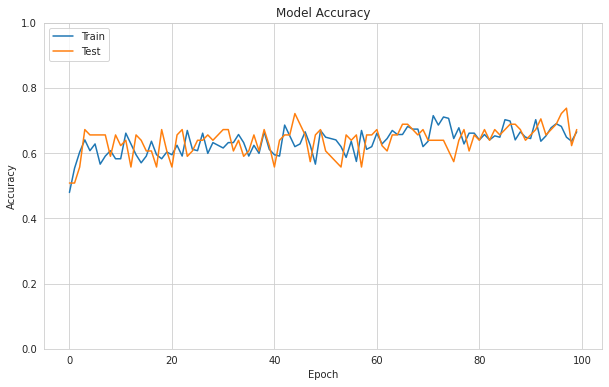

In [ ]:
plt.figure(figsize =(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim((0, 1))
plt.legend(['Train', 'Test'], loc='upper left');

In [ ]:
predictions = model.predict(test_ds)
bin_predictions = tf.round(predictions).numpy().flatten()
bin_predictions

Consider rewriting this model with the Functional API.


array([1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0.], dtype=float32)

**Thank You** 
--